In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [7]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad['MgSO4 Salt Mass E'] = peakLoad['Peak Load']/0.75
peakLoad['MgSO4 Salt Mass P'] = peakLoad['Peak Load']/0.281267306
peakLoad['MgSO4 Salt Mass'] = peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E'], axis=1)

peakLoad['MgCl2 Salt Mass E'] = peakLoad['Peak Load']/0.193056
peakLoad['MgCl2 Salt Mass P'] = peakLoad['Peak Load']/0.084767892
peakLoad['MgCl2 Salt Mass'] = peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E'], axis=1)

peakLoad['K2CO3 Salt Mass E'] = peakLoad['Peak Load']/0.186111
peakLoad['K2CO3 Salt Mass P'] = peakLoad['Peak Load']/1.646738256
peakLoad['K2CO3 Salt Mass'] = peakLoad[['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E'], axis=1)

peakLoad['SrBr2 Salt Mass E'] = peakLoad['Peak Load']/0.3556
peakLoad['SrBr2 Salt Mass P'] = peakLoad['Peak Load']/0.811253581
peakLoad['SrBr2 Salt Mass'] = peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E'], axis=1)

peakLoad

,building id,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,1,27.724174,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495
1,2,20.164945,41411.346548,0.234433,71.693170,237.884232,108.349022,56.706819
2,3,18.771555,36953.435376,0.224725,66.739200,221.446522,100.862146,52.788400
3,4,16.617412,31673.736508,0.217586,59.080496,196.034272,89.287640,46.730630
4,5,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953
...,...,...,...,...,...,...,...,...
395,396,12.189566,23415.204886,0.219283,43.338012,143.799328,65.496214,34.278869
396,397,12.662940,24918.728631,0.224640,45.021018,149.383689,68.039720,35.610069
397,398,4.833286,7854.976581,0.185523,17.183958,57.017881,25.969908,13.591917
398,399,14.577960,28841.437895,0.225848,51.829559,171.975025,78.329386,40.995389


In [8]:
# Load Reduction under cost minimization:
loadReduction = pd.read_excel(ResultsFolder + 'loadReduction_MgSO4.xlsx')
loadReduction_MgCl2 = pd.read_excel(ResultsFolder + 'loadReduction_MgCl2.xlsx')
loadReduction_K2CO3 = pd.read_excel(ResultsFolder + 'loadReduction_K2CO3.xlsx')
loadReduction_SrBr2 = pd.read_excel(ResultsFolder + 'loadReduction_SrBr2.xlsx')

# Clean up:
loadReduction = loadReduction.rename(columns={'Unnamed: 0': 'building id'})
loadReduction = loadReduction.sort_values(by=['building id'])
loadReduction = loadReduction.reset_index()
loadReduction = loadReduction[['building id', 'Reduced peak load (fraction)']]

loadReduction_MgCl2 = loadReduction_MgCl2.rename(columns={'Unnamed: 0': 'building id'})
loadReduction_MgCl2 = loadReduction_MgCl2.sort_values(by=['building id'])
loadReduction_MgCl2 = loadReduction_MgCl2.reset_index()
loadReduction_MgCl2 = loadReduction_MgCl2[['building id', 'Reduced peak load (fraction)']]

loadReduction_K2CO3 = loadReduction_K2CO3.rename(columns={'Unnamed: 0': 'building id'})
loadReduction_K2CO3 = loadReduction_K2CO3.sort_values(by=['building id'])
loadReduction_K2CO3 = loadReduction_K2CO3.reset_index()
loadReduction_K2CO3 = loadReduction_K2CO3[['building id', 'Reduced peak load (fraction)']]

loadReduction_SrBr2 = loadReduction_SrBr2.rename(columns={'Unnamed: 0': 'building id'})
loadReduction_SrBr2 = loadReduction_SrBr2.sort_values(by=['building id'])
loadReduction_SrBr2 = loadReduction_SrBr2.reset_index()
loadReduction_SrBr2 = loadReduction_SrBr2[['building id', 'Reduced peak load (fraction)']]

loadReduction['Peak Load'] = peakLoad['Peak Load']
loadReduction['% Load Reduced - MgSO4'] = 1- loadReduction['Reduced peak load (fraction)']
loadReduction['Peak Load - MgSO4'] = loadReduction['Peak Load']*loadReduction['Reduced peak load (fraction)']
loadReduction['% Load Reduced - MgCl2'] = 1- loadReduction_MgCl2['Reduced peak load (fraction)']
loadReduction['Peak Load - MgCl2'] = loadReduction['Peak Load']*loadReduction_MgCl2['Reduced peak load (fraction)']
loadReduction['% Load Reduced - K2CO3'] = 1- loadReduction_K2CO3['Reduced peak load (fraction)']
loadReduction['Peak Load - K2CO3'] = loadReduction['Peak Load']*loadReduction_K2CO3['Reduced peak load (fraction)']
loadReduction['% Load Reduced - SrBr2'] = 1- loadReduction_SrBr2['Reduced peak load (fraction)']
loadReduction['Peak Load - SrBr2'] = loadReduction['Peak Load']*loadReduction_SrBr2['Reduced peak load (fraction)']

In [9]:

ordered_loadReduction = loadReduction.sort_values(by='Peak Load')
ordered_loadReduction = ordered_loadReduction.reset_index()
ordered_loadReduction['building'] = ordered_loadReduction.index + 1

ordered_loadReduction

,index,building id,Reduced peak load (fraction),Peak Load,% Load Reduced - MgSO4,Peak Load - MgSO4,% Load Reduced - MgCl2,Peak Load - MgCl2,% Load Reduced - K2CO3,Peak Load - K2CO3,% Load Reduced - SrBr2,Peak Load - SrBr2,building
0,304,305,0.745239,2.931349,0.254761,2.184557,0.248458,2.203033,0.219291,2.288530,0.219291,2.288530,1
1,210,211,0.632507,3.267824,0.367493,2.066922,0.358994,2.094696,0.329337,2.191610,0.329337,2.191610,2
2,233,234,0.627644,3.335892,0.372356,2.093751,0.364639,2.119497,0.337133,2.211251,0.337133,2.211251,3
3,338,339,0.670694,3.346160,0.329306,2.244250,0.321565,2.270152,0.292933,2.365958,0.292933,2.365958,4
4,99,100,0.680342,4.456120,0.319658,3.031688,0.314331,3.055424,0.284983,3.186203,0.284983,3.186203,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,386,0.857159,27.341019,0.142841,23.435602,0.133607,23.688071,0.101133,24.575927,0.101133,24.575927,396
396,0,1,0.841158,27.724174,0.158842,23.320420,0.149489,23.579717,0.116329,24.499057,0.116329,24.499057,397
397,4,5,0.865769,27.902137,0.134231,24.156818,0.125042,24.413198,0.092076,25.333008,0.092076,25.333008,398
398,399,400,0.844090,28.411462,0.155910,23.981826,0.146605,24.246208,0.113883,25.175878,0.113883,25.175878,399


In [9]:
[ordered_loadReduction.sum(),ordered_loadReduction.min(),ordered_loadReduction.max(),ordered_loadReduction.mean()]

[index                           79800.000000
 building id                     80200.000000
 Reduced peak load (fraction)      314.519695
 Peak Load                        5016.291755
 % Load Reduced - MgSO4             85.480305
 Peak Load - MgSO4                4024.300275
 % Load Reduced - MgCl2             82.095089
 Peak Load - MgCl2                4066.927071
 % Load Reduced - K2CO3             69.479534
 Peak Load - K2CO3                4223.548197
 % Load Reduced - SrBr2             69.368622
 Peak Load - SrBr2                4226.883610
 building                        80200.000000
 dtype: float64,
 index                           0.000000
 building id                     1.000000
 Reduced peak load (fraction)    0.613670
 Peak Load                       2.931349
 % Load Reduced - MgSO4          0.000000
 Peak Load - MgSO4               2.066922
 % Load Reduced - MgCl2          0.016869
 Peak Load - MgCl2               2.094696
 % Load Reduced - K2CO3          0.081868
 Peak L

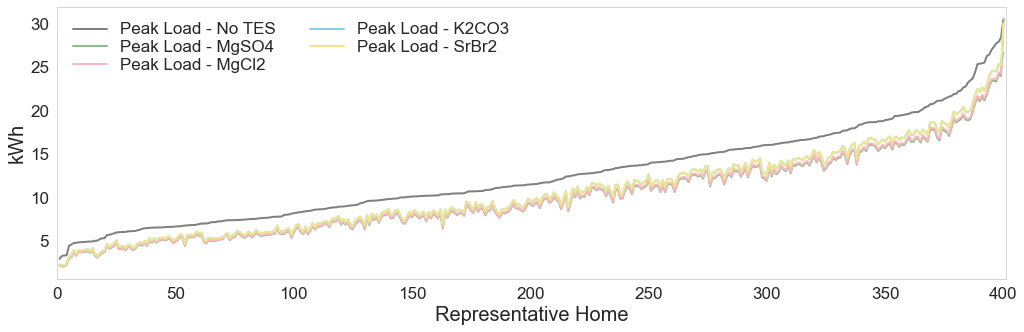

In [10]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load'], linewidth=2, linestyle='-',color = 'gray', label='Peak Load - No TES')
ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load - MgSO4'], linewidth=2, linestyle='-',color = 'darkseagreen', label='Peak Load - MgSO4')
ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load - MgCl2'], linewidth=2, linestyle='-',color = 'lightpink', label='Peak Load - MgCl2')
ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load - K2CO3'], linewidth=2, linestyle='-',color = 'skyblue', label='Peak Load - K2CO3')
ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load - SrBr2'], linewidth=2, linestyle='-',color = 'khaki', label='Peak Load - SrBr2')

#ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Representative Home",fontsize=20)
plt.ylabel("kWh", fontsize=20)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
ax.tick_params(length=0, pad=8, labelsize=17, color='k')
ax.legend(fontsize=17, ncol=2,handleheight=0.5, frameon=False, labelspacing=0.15, loc='upper left')

fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/peak_load_LR.png', dpi=300, bbox_inches='tight')

In [45]:
ordered_loadReduction.to_csv(ResultsFolder+"peak_load_LR.csv")

In [11]:
# Load Reduction under Peak Load reduction maximization:
loadReduction = pd.read_excel(ResultsFolder + 'max_purchased_electricity_salt_Fixed_Rate_Opt_Size_MgSO4.xlsx')
loadReduction_MgCl2 = pd.read_excel(ResultsFolder + 'max_purchased_electricity_salt_Fixed_Rate_Opt_Size_MgCl2.xlsx')
loadReduction_K2CO3 = pd.read_excel(ResultsFolder + 'max_purchased_electricity_salt_Fixed_Rate_Opt_Size_K2CO3.xlsx')
loadReduction_SrBr2 = pd.read_excel(ResultsFolder + 'max_purchased_electricity_salt_Fixed_Rate_Opt_Size_SrBr2.xlsx')

# Clean up:
loadReduction = loadReduction.sort_values(by=['building id'])
loadReduction = loadReduction.reset_index()
loadReduction = loadReduction[['building id', 'purchased electricity']]

loadReduction_MgCl2 = loadReduction_MgCl2.sort_values(by=['building id'])
loadReduction_MgCl2 = loadReduction_MgCl2.reset_index()
loadReduction_MgCl2 = loadReduction_MgCl2[['building id', 'purchased electricity']]

loadReduction_K2CO3 = loadReduction_K2CO3.sort_values(by=['building id'])
loadReduction_K2CO3 = loadReduction_K2CO3.reset_index()
loadReduction_K2CO3 = loadReduction_K2CO3[['building id', 'purchased electricity']]

loadReduction_SrBr2 = loadReduction_SrBr2.sort_values(by=['building id'])
loadReduction_SrBr2 = loadReduction_SrBr2.reset_index()
loadReduction_SrBr2 = loadReduction_SrBr2[['building id', 'purchased electricity']]

loadReduction['Peak Load'] = peakLoad['Peak Load']
loadReduction['Peak Load - MgSO4'] = loadReduction['purchased electricity']
loadReduction['Peak Load - MgCl2'] = loadReduction_MgCl2['purchased electricity']
loadReduction['Peak Load - K2CO3'] = loadReduction_K2CO3['purchased electricity']
loadReduction['Peak Load - SrBr2'] = loadReduction_SrBr2['purchased electricity']

ordered_loadReduction = loadReduction.sort_values(by='Peak Load')
ordered_loadReduction = ordered_loadReduction.reset_index()
ordered_loadReduction['building'] = ordered_loadReduction.index + 1

ordered_loadReduction

,index,building id,purchased electricity,Peak Load,Peak Load - MgSO4,Peak Load - MgCl2,Peak Load - K2CO3,Peak Load - SrBr2,building
0,304,305,2.292857,2.931349,2.292857,2.459742,2.668054,2.668054,1
1,210,211,2.723932,3.267824,2.723932,2.870175,3.020465,3.020465,2
2,233,234,2.899700,3.335892,2.899700,3.136520,3.205753,3.205753,3
3,338,339,2.810014,3.346160,2.810014,3.017722,3.215948,3.215948,4
4,99,100,4.288699,4.456120,4.288699,4.333962,4.432750,4.432750,5
...,...,...,...,...,...,...,...,...,...
395,385,386,26.348947,27.341019,26.348947,26.562520,27.039225,27.039225,396
396,0,1,25.670833,27.724174,25.670833,25.963491,27.312529,27.312529,397
397,4,5,26.846781,27.902137,26.846781,27.078052,27.767315,27.767315,398
398,399,400,27.382423,28.411462,27.382423,27.626208,28.328216,28.328216,399


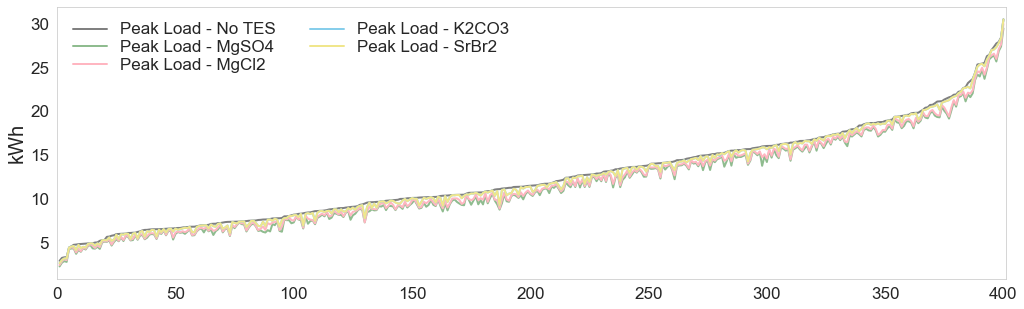

In [18]:
fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load'], linewidth=2, linestyle='-',color = 'gray', label='Peak Load - No TES')
ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load - MgSO4'], linewidth=2, linestyle='-',color = 'darkseagreen', label='Peak Load - MgSO4')
ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load - MgCl2'], linewidth=2, linestyle='-',color = 'lightpink', label='Peak Load - MgCl2')
ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load - K2CO3'], linewidth=2, linestyle='-',color = 'skyblue', label='Peak Load - K2CO3')
ax.plot(ordered_loadReduction['building'], ordered_loadReduction['Peak Load - SrBr2'], linewidth=2, linestyle='-',color = 'khaki', label='Peak Load - SrBr2')

#ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlabel("Representative Home",fontsize=20)
plt.ylabel("kWh", fontsize=20)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
ax.tick_params(length=0, pad=8, labelsize=17, color='k')
ax.legend(fontsize=17, ncol=2,handleheight=0.5, frameon=False, labelspacing=0.15, loc='upper left')

fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/peak_load_CM.png', dpi=300, bbox_inches='tight')

In [19]:
ordered_loadReduction.min()

index                    0.000000
building id              1.000000
purchased electricity    2.292857
Peak Load                2.931349
Peak Load - MgSO4        2.292857
Peak Load - MgCl2        2.459742
Peak Load - K2CO3        2.668054
Peak Load - SrBr2        2.668054
building                 1.000000
dtype: float64

In [20]:
ordered_loadReduction.to_csv(ResultsFolder+"peak_load_CM.csv")